In [1]:
# Este código filtra entre todas las biotech (impessions)
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import matplotlib as plt
import warnings
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
import pymysql
import seaborn as sns
from datetime import datetime, timedelta
from datetime import datetime
import re
import time
import ast
from datetime import datetime
from finvizfinance.screener.overview import Overview
from finvizfinance.quote import finvizfinance
import yfinance as yf
from yahoo_fin import news as yf_news
now = datetime.now()
# Format the date and time as a string
date_str = now.strftime("%Y%m%d")
pd.set_option("display.max_colwidth", 150)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
directory = 'input'
filename = 'df_allBiotech_2024-12-17.csv'

file_path = os.path.join(directory, filename)
df = pd.read_csv(file_path)

In [3]:
df

,Ticker,Company,ipo_date,MarketCap_M,Employees,Volume_m,revenueM,ebitdaM,web,Country,Industry,BusinessSummary
0,AADI,Aadi Bioscience Inc,2018-02-16,58.66,53,117.00,25.07,-63.40,https://aadibio.com,USA,Biotechnology,"Aadi Bioscience, Inc., a biopharmaceutical company, engages in developing and commercializing precision therapies for genetically defined cancers ..."
1,ABCL,AbCellera Biologics Inc,2020-12-11,844.75,586,2208.00,32.96,-222.24,https://www.abcellera.com,Canada,Biotechnology,AbCellera Biologics Inc. builds an engine for antibody drug discovery and development. Its engine discovers antibodies from natural immune respons...
2,ABEO,Abeona Therapeutics Inc,1980-09-19,256.04,84,276.00,0.00,-54.75,https://www.abeonatherapeutics.com,USA,Biotechnology,"Abeona Therapeutics Inc., a clinical-stage biopharmaceutical company, develops gene and cell therapies for life-threatening diseases. Its lead cli..."
3,ABOS,Acumen Pharmaceuticals Inc,2021-07-01,118.36,51,219.00,0.00,-92.84,https://acumenpharm.com,USA,Biotechnology,"Acumen Pharmaceuticals, Inc., a clinical-stage biopharmaceutical company, develops targeted therapies for the treatment of Alzheimer's disease. Th..."
4,ABP,Abpro Holdings Inc,2022-03-09,65.94,15,28.00,0.07,-11.31,https://abpro.com,USA,Biotechnology,"Abpro Holdings, Inc., a biotechnology company, engages in developing antibody therapeutics for patients with immuno-oncology, ophthalmology, and a..."
5,ABSI,Absci Corp,2021-07-22,439.90,155,1380.00,4.21,-89.71,https://www.absci.com,USA,Biotechnology,Absci Corporation operates as a data-first generative artificial intelligence (AI) drug creation company in the United States. The company combine...
6,ABUS,Arbutus Biopharma Corp,2007-07-26,672.70,73,974.00,6.74,-77.14,https://www.arbutusbio.com,USA,Biotechnology,"Arbutus Biopharma Corporation, a biopharmaceutical company, develops novel therapeutics for chronic Hepatitis B virus (HBV) infection in the Unite..."
7,ABVC,ABVC BioPharma Inc,2004-11-10,6.24,16,248.00,0.14,-8.51,https://www.abvcpharma.com,USA,Biotechnology,"ABVC BioPharma, Inc., a clinical stage biopharmaceutical company, develops drugs and medical devices to fulfill unmet medical needs in the United ..."
8,ABVX,Abivax ADR,2023-10-20,500.36,62,131.00,9.03,-169.87,https://www.abivax.com,France,Biotechnology,"ABIVAX Société Anonyme, a clinical-stage biotechnology company, focuses on developing therapeutics that harness the body's natural regulatory mech..."
9,ACAD,Acadia Pharmaceuticals Inc,2004-05-27,2885.24,620,1469.00,929.24,124.54,https://www.acadia.com,USA,Biotechnology,"ACADIA Pharmaceuticals Inc., a biopharmaceutical company, focuses on the development and commercialization innovative medicines that address unmet..."


# ETIQUETADO DEL DATAFRAME

In [11]:
def get_ipo_price(ticker_value, start_date, end_date):
    stock = yf.Ticker(ticker_value)
    historical_data = stock.history(start=start_date, end=end_date)
    time.sleep(2)
    if historical_data.empty:
        print(f"No data found for {ticker_value} between {start_date} and {end_date}.")
        return None
    
    closing_price = historical_data['Close'].iloc[0]
    return closing_price

In [12]:
# fill ipo_price for each Ticker
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

# Apply with the end_date as yesterday
df['ipo_price'] = df.apply(
    lambda row: get_ipo_price(row['Ticker'], row['ipo_date'], end_date=yesterday), axis=1
)

In [15]:
# fill yesterday price
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
before_yesterday = (datetime.now() - timedelta(days=4)).strftime('%Y-%m-%d')

# Apply with the end_date as yesterday
df['Price'] = df.apply(
    lambda row: get_ipo_price(row['Ticker'], start_date=before_yesterday, end_date=yesterday), axis=1
)

In [ ]:
df['Fall'] = (df['Price'] - df['ipo_price']) / df['ipo_price']*100

In [87]:
# Calcula los dias que han pasado desde el IPO
df['ipo_date'] = pd.to_datetime(df['ipo_date'], errors='coerce')

# Get today's date
today = datetime.today()

# Calculate the days passed since ipo_date and store in a new column
df['days'] = (today - df['ipo_date']).dt.days

In [120]:
# Porcentaje que supone la pérdida o ebitda sobre el capital
df_sorted_full['RoK'] = df_sorted_full['ebitdaM'] / df_sorted_full['MarketCap_M'] * 100

In [122]:
df_sorted_full = df_sorted_full.sort_values(by='Fall', ascending=False)
df_sorted_full = df_sorted_full.reset_index(drop=True)

In [123]:
df_sorted_full[['Ticker', 'Company', 'ipo_date', 'days', 'MarketCap_M', 'Employees', 'revenueM', 'ebitdaM', 'RoK','ipo_price','Price','Fall','Volume_m']]

,Ticker,Company,ipo_date,days,MarketCap_M,Employees,revenueM,ebitdaM,RoK,ipo_price,Price,Fall,Volume_m
0,TECH,Bio-Techne Corp,1989-02-09,13095,12101.22,3100,1171.58,308.52,2.55,0.09,75.69,82131.76,922.00
1,VRTX,"Vertex Pharmaceuticals, Inc",1991-07-24,12200,120546.75,5400,10625.80,4446.60,3.69,4.50,463.73,10205.11,1171.00
2,UTHR,United Therapeutics Corp,1999-06-17,9315,16644.81,1168,2756.20,1412.10,8.48,6.09,361.81,5837.39,330.00
3,INCY,Incyte Corp,1993-11-04,11366,13446.97,2524,4075.86,80.49,0.60,1.88,68.55,3556.00,2066.00
4,ALNY,Alnylam Pharmaceuticals Inc,2004-06-01,7504,31470.08,2100,2094.80,-132.15,-0.42,7.00,245.44,3406.29,772.00
5,REGN,"Regeneron Pharmaceuticals, Inc",1991-04-02,12313,79655.96,14165,13847.10,4598.00,5.77,21.12,731.30,3361.78,814.00
6,ARGX,Argen X SE ADR,2017-05-18,2770,37829.53,1148,1908.66,-150.08,-0.40,23.00,607.21,2540.02,262.00
7,BHST,BioHarvest Sciences Inc,2021-01-08,1439,106.57,0,19.13,-7.21,-6.77,0.29,6.15,2020.69,7.00
8,KRYS,Krystal Biotech Inc,2017-09-20,2645,4820.55,229,241.52,69.14,1.43,10.64,163.64,1437.97,233.00
9,TVTX,Travere Therapeutics Inc,2012-11-08,4422,1523.10,380,203.45,-238.74,-15.67,1.50,17.32,1054.67,1695.00


In [129]:
# Etiquetado:  Por tiempo en el mercado 'term', por si ya están muertas o no 'profit' y por tamaño 'animal'
df_sorted_full['term'] = df_sorted_full['days'].apply(lambda x: 'Old' if x > 1500 else 'New')
df_sorted_full['profit'] = df_sorted_full['Fall'].apply(lambda x: 'Alive' if x > -10 else 'Dead')
df_sorted_full['animal'] = df_sorted_full.apply(
    lambda row: 'Mamut' if row['MarketCap_M'] > 600 or row['Employees'] > 100 else 'Gacela',
    axis=1
)
df_sorted_full

,Ticker,Company,ipo_date,MarketCap_M,Employees,Volume_m,revenueM,ebitdaM,web,Country,Industry,BusinessSummary,ipo_price,Price,Fall,days,RoK,term,profit,animal
0,TECH,Bio-Techne Corp,1989-02-09,12101.22,3100,922.00,1171.58,308.52,https://www.bio-techne.com,USA,Biotechnology,"Bio-Techne Corporation, together with its subsidiaries, develops, manufactures, and sells life science reagents, instruments, and services for the...",0.09,75.69,82131.76,13095,2.55,Old,Alive,Mamut
1,VRTX,"Vertex Pharmaceuticals, Inc",1991-07-24,120546.75,5400,1171.00,10625.80,4446.60,https://www.vrtx.com,USA,Biotechnology,"Vertex Pharmaceuticals Incorporated, a biotechnology company, engages in developing and commercializing therapies for treating cystic fibrosis (CF...",4.50,463.73,10205.11,12200,3.69,Old,Alive,Mamut
2,UTHR,United Therapeutics Corp,1999-06-17,16644.81,1168,330.00,2756.20,1412.10,https://www.unither.com,USA,Biotechnology,"United Therapeutics Corporation, a biotechnology company, engages in the development and commercialization of products to address the unmet medica...",6.09,361.81,5837.39,9315,8.48,Old,Alive,Mamut
3,INCY,Incyte Corp,1993-11-04,13446.97,2524,2066.00,4075.86,80.49,https://www.incyte.com,USA,Biotechnology,"Incyte Corporation, a biopharmaceutical company, engages in the discovery, development, and commercialization of therapeutics for hematology/oncol...",1.88,68.55,3556.00,11366,0.60,Old,Alive,Mamut
4,ALNY,Alnylam Pharmaceuticals Inc,2004-06-01,31470.08,2100,772.00,2094.80,-132.15,https://www.alnylam.com,USA,Biotechnology,"Alnylam Pharmaceuticals, Inc., a biopharmaceutical company, focuses on discovering, developing, and commercializing novel therapeutics based on ri...",7.00,245.44,3406.29,7504,-0.42,Old,Alive,Mamut
5,REGN,"Regeneron Pharmaceuticals, Inc",1991-04-02,79655.96,14165,814.00,13847.10,4598.00,https://www.regeneron.com,USA,Biotechnology,"Regeneron Pharmaceuticals, Inc. discovers, invents, develops, manufactures, and commercializes medicines for treating various diseases worldwide. ...",21.12,731.30,3361.78,12313,5.77,Old,Alive,Mamut
6,ARGX,Argen X SE ADR,2017-05-18,37829.53,1148,262.00,1908.66,-150.08,https://www.argenx.com,Netherlands,Biotechnology,"argenx SE, a biotechnology company, engages in the developing of various therapies for the treatment of autoimmune diseases in the United States, ...",23.00,607.21,2540.02,2770,-0.40,Old,Alive,Mamut
7,BHST,BioHarvest Sciences Inc,2021-01-08,106.57,0,7.00,19.13,-7.21,https://www.bioharvest.com,Canada,Biotechnology,BioHarvest Sciences Inc. operates as a biotechnology company. The company operates through Nutraceuticals and Pharmaceuticals segments. It develop...,0.29,6.15,2020.69,1439,-6.77,New,Alive,Gacela
8,KRYS,Krystal Biotech Inc,2017-09-20,4820.55,229,233.00,241.52,69.14,https://www.krystalbio.com,USA,Biotechnology,"Krystal Biotech, Inc., a commercial-stage biotechnology company, discovers, develops, and commercializes genetic medicines for patients with rare ...",10.64,163.64,1437.97,2645,1.43,Old,Alive,Mamut
9,TVTX,Travere Therapeutics Inc,2012-11-08,1523.10,380,1695.00,203.45,-238.74,https://www.travere.com,USA,Biotechnology,"Travere Therapeutics, Inc., a biopharmaceutical company, identifies, develops, and delivers therapies to people living with rare kidney and metabo...",1.50,17.32,1054.67,4422,-15.67,Old,Alive,Mamut


GRAFICACIÓN DEL UNIVERSO

In [66]:
# Define the bin edges: -100 to 100 in steps of 20, and add an open-ended last bin
bin_edges = list(range(-100, 101, 25))  # Bins from -100 to 100
bin_edges.append(float('inf'))  # Add a final open-ended bin for values >= 100

# Label the bins for readability
bin_labels = [f"({bin_edges[i]}, {bin_edges[i+1]}]" for i in range(len(bin_edges)-2)] + ['>= 100']

# Use pd.cut to categorize the 'Fall' values into bins
df_sorted_full['Range'] = pd.cut(df_sorted_full['Fall'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=True)

# Count the number of occurrences in each bin
bin_counts = df_sorted_full['Range'].value_counts().sort_index()

# Display the bin counts
print("Count of values in each range:")
print(bin_counts)

Count of values in each range:
Range
(-100, -75]    423
(-75, -50]      67
(-50, -25]      47
(-25, 0]        32
(0, 25]         23
(25, 50]         6
(50, 75]         8
(75, 100]        4
>= 100          59
Name: count, dtype: int64


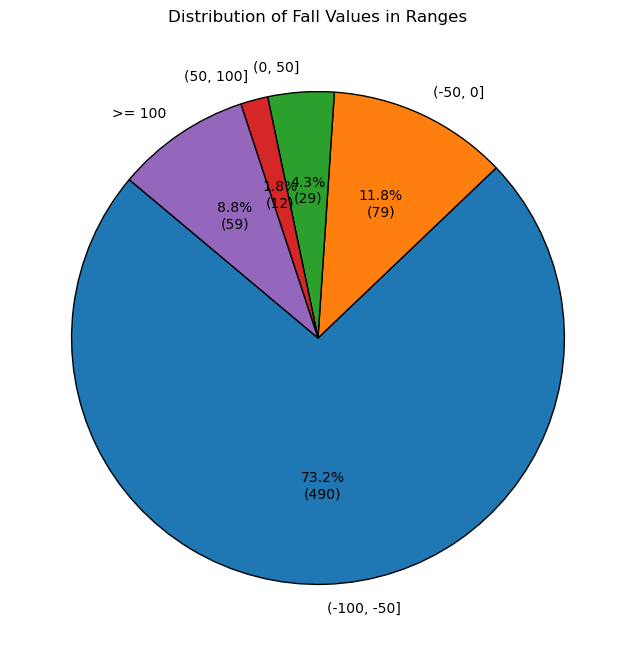

In [65]:

# Custom autopct function to show percentages and values
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({val})"

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    bin_counts, 
    labels=bin_counts.index, 
    autopct=lambda pct: autopct_format(pct, bin_counts), 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Distribution of Fall Values in Ranges')

# Show the pie chart
plt.show()

ALMACENAMOS EL DATAFRAME

In [132]:
#Save to directory
output_directory = "output"
date_string = datetime.now().strftime("%Y-%m-%d")
file_name = f"labeled_biothec_{date_string}_.csv"


# Construct the full path
file_path = os.path.join(output_directory, file_name)

# Save the DataFrame to a CSV file
df_sorted_full.to_csv(file_path, index=False)

print(f"DataFrame has been saved to: {file_path}")

DataFrame has been saved to: output\labeled_biothec_2024-12-17_.csv


In [131]:
#Save to directory
output_directory = "output"
date_string = datetime.now().strftime("%Y-%m-%d")
file_name = f"df_allBiotech_WITH_PRICE_{date_string}_.csv"


# Construct the full path
file_path = os.path.join(output_directory, file_name)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"DataFrame has been saved to: {file_path}")

DataFrame has been saved to: output\df_allBiotech_WITH_PRICE_2024-12-17_.csv
